# Moessbauer spectrum

In [1]:
# import packages
import nexus as nx
import numpy as np
import matplotlib.pyplot as plt

# define a sample with one layer and one set of hyperfine parameters

# the material is loaded from the nexus.lib.material which host a lot of materials
# the pre-defined Fe contains the isotope properties already
iron = nx.Material.Template(nx.lib.material.Fe)

# look at all the material parameters of the iron material
print(iron)

# create a layer
layer_Fe = nx.Layer(id = "Fe layer",
                    material = iron,
                    thickness = 3000)  # in nanometer

print(layer_Fe)

# define Hyperfine parameters
# only one set of parameters, called a site
# the hyperfine field is assumed to be isotropically distributed
# the quadrupole splittingis zero here
# a Hyperfine site has much more parameters that can be set
# but we use all the other pre-defined keyword values of 0 for now
site = nx.Hyperfine(magnetic_field = 33,
                    isotropic = True)

# look at all the parameters of the site
print(site)

# set the materials hyperfine sites by a list
# you can put as many sites as you want to that material
iron.hyperfine_sites = [site]

# define the layers of the sample by a list
sample = nx.Sample(layers = [layer_Fe])

# print the sample
print(sample)

Material
  .id: Fe
  .composition:  Fe 1.0
  .density (g/cm^3) Var.value = 7.874, .min = 0.0, .max = 7.874, .fit: False, .id: 
  .isotope: 57-Fe
  .abundance Var.value = 0.02119, .min = 0.0, .max = 1.0, .fit: False, .id: 
  .lamb_moessbauer Var.value = 0.796, .min = 0.0, .max = 1.0, .fit: False, .id: 
    derived parameters:
    .total_number_density (1/m^3) = 8.487550450450646e+28
    .average_mole_mass (g/mole) = 55.868105434026994
    .isotope_number_density (1/m^3) = 1.7985119404504918e+27
    number of hyperfine sites 0

Layer
  .id: Fe layer
  .material.id: Fe
  .material.composition:  Fe 1.0,
  .material.density (g/cm^3) Var.value = 7.874, .min = 0.0, .max = 7.874, .fit: False, .id: 
  .thickness (nm) Var.value = 3000.0, .min = 0.0, .max = inf, .fit: False, .id: 
  .roughness (nm, sigma) Var.value = 0.0, .min = 0.0, .max = inf, .fit: False, .id: 
  .thickness_fwhm (nm) Var.value = 0.0, .min = 0.0, .max = inf, .fit: False, .id: 

Hyperfine .id: 
  .weight =               1.0
  .i

In [2]:
# define a beam
# set to correct polarization for classical Moessbauer spectroscopy
beam  = nx.Beam(polarization = 0)

# define the experiment
exp = nx.Experiment(beam = beam,
                    objects = [sample],  # a list of objects
                    isotope = nx.moessbauer.Fe57)  # define the isotope for calculation

print(exp)

# let's have a look to the isotope properties
print(exp.isotope)

Experiment:
  .id: 
  .beam.id: 
  .objects:
    index: 0, type: Sample, .id: 

MoessbauerIsotope: 57-Fe
  .element = Fe
  .mass (u) = 56.9353933
  .spin_ground = 0.5
  .spin_excited = 1.5
  .energy (eV) = 14412.497
  .wavelength (m) = 8.602548e-11
  .kvector (1/m) = 7.303865e+10
  .lifetime (s) = 1.411100e-07
  .half_lifetime (s) = 9.781000e-08
  .gamma (eV) = 4.664531e-09
  .gamma_photon (eV) = 5.064637e-10
  .gamma_electron (eV) = 4.158067e-09
  .quality_factor = 3.089806e+12
  .internal_conversion = 8.21
  .multipolarity = M1 (L = 1, lambda = 0)
  .mixing_ratio_E2M1 = 0.0
  .gfactor_ground = 0.18121
  .gfactor_excited = -0.10348
  .quadrupole_ground (barn) = 0.0
  .quadrupole_excited (barn) = 0.187
  .interference_term (beat) = 0.0
  .magnetic_moment_ground (eV/T) = 2.85627845959275e-09
  .magnetic_moment_excited (eV/T) = -4.8932348380110005e-09
  .nuclear_cross_section (converted to kbarn) = 2557.671207310153



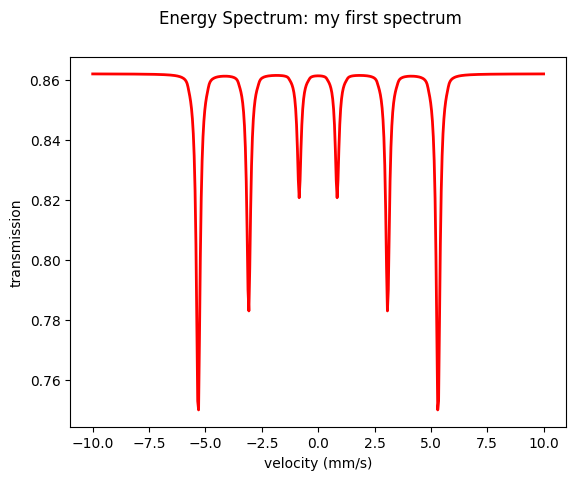

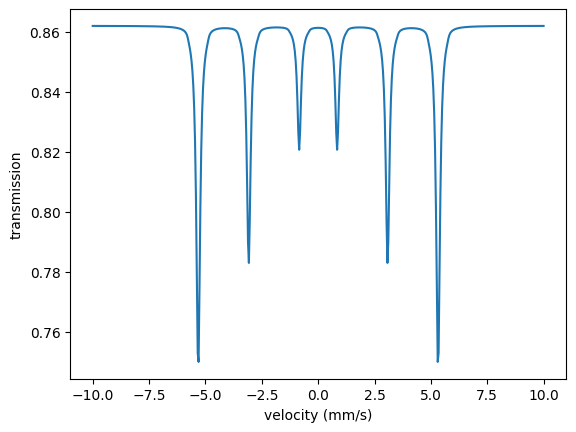

In [3]:
# define a range of the calculation
# You have a range of velocities, for example
velocities = np.linspace(-10, 10, 512)  # in mm/s

# convert to detuning in units of linewidth
# will give a detuning of roughly 200 Gamma
#  exp_detuning = nx.conversions.VelocityToGamma(velocities, nx.lib.moessbauer.Fe57)

# define the Moessbauer spectrum measurement
moessbauer_spectrum = nx.MoessbauerSpectrum(experiment = exp,
                                            velocity = velocities,
                                            id  = "my first spectrum")

# calculate the Moessbauer spectrum
# returns the intensity (ndarray)
intensity = moessbauer_spectrum.Calculate()


moessbauer_spectrum.Plot(velocity = True)

plt.plot(velocities, intensity)

#nx.cvar.atomic_scattering_factors_cxro = True
#plt.plot(velocities, moessbauer_spectrum.Calculate())

plt.xlabel('velocity (mm/s)')
plt.ylabel('transmission')
plt.show()

In [4]:
# define the time spectrum measurement
time_spectrum = nx.TimeSpectrum(experiment = exp,
                                time_length = 200,  # in ns
                                time_step = 0.1,#)
                                max_detuning = 0)  # in ns

In [5]:
# calculate the time spectrum
# a calculation can also be performed by the () operator of a measurement
time_axis, intensity = time_spectrum()
# both arrays are also available via

print(np.array(time_spectrum.detuning))

[-4433.10139348 -4432.56024341 -4432.01909334 ...  4431.47794326
  4432.01909334  4432.56024341]


<>:6: SyntaxWarning: invalid escape sequence '\G'
<>:6: SyntaxWarning: invalid escape sequence '\G'
C:\Users\lbocklag\AppData\Local\Temp\ipykernel_16008\13495578.py:6: SyntaxWarning: invalid escape sequence '\G'
  plt.ylabel('Intensity ($\Gamma$/ns)')


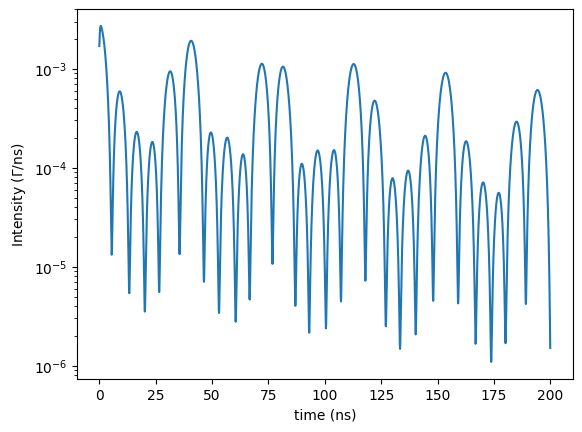

In [6]:
time_axis = time_spectrum.time
intensity = time_spectrum.result

plt.semilogy(time_axis, intensity)
plt.xlabel('time (ns)')
plt.ylabel('Intensity ($\Gamma$/ns)')
plt.show()

<>:10: SyntaxWarning: invalid escape sequence '\G'
<>:10: SyntaxWarning: invalid escape sequence '\G'
C:\Users\lbocklag\AppData\Local\Temp\ipykernel_16008\2189171690.py:10: SyntaxWarning: invalid escape sequence '\G'
  plt.ylabel('Intensity ($\Gamma$/ns)')


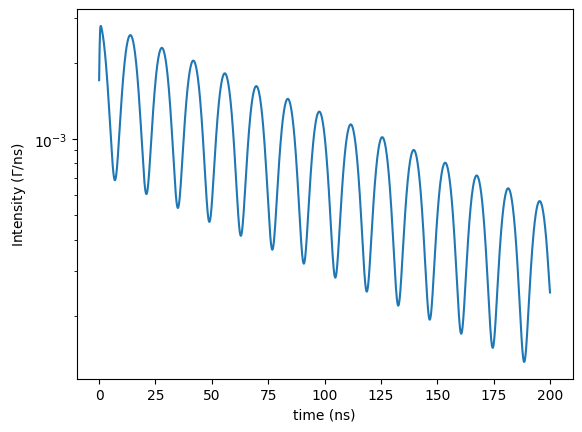

In [7]:
# At the synchrotron the beam is linearly polarized along sigma direction
beam.LinearSigma()

# and we assume that an external magentic field aligns the hyperfine field along beam direction
site.isotropic = False
site.magnetic_theta = 0  # polar angle with respect to beam propagation

plt.semilogy(*time_spectrum())
plt.xlabel('time (ns)')
plt.ylabel('Intensity ($\Gamma$/ns)')
plt.show()